# Cleaning

In [2]:
# Data Manipulation
import pandas as pd

# Visualisation

import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

# Statistics

import numpy as np
from scipy.stats import kruskal
import scikit_posthocs as sp



sns.set_theme(style='darkgrid', palette='dark')

In [3]:
df = pd.read_csv("final_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1052 non-null   int64  
 1   Country      1052 non-null   object 
 2   Player       1052 non-null   object 
 3   Team         1052 non-null   object 
 4   Base price   1052 non-null   float64
 5   Winning bid  1052 non-null   object 
 6   Year         1052 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 57.7+ KB


In [4]:
df.nunique()

Unnamed: 0     1052
Country          29
Player          593
Team             17
Base price       15
Winning bid     128
Year             11
dtype: int64

In [5]:
df.head()

,Unnamed: 0,Country,Player,Team,Base price,Winning bid,Year
0,0,Guyana,Christopher Barnwell,Royal Challengers Bangalore,30.5,30.5,2013
1,1,South Africa,Johan Botha,Delhi Daredevils,183.0,274.5,2013
2,2,Australia,Daniel Christian,Royal Challengers Bangalore,61.0,61.0,2013
3,3,Australia,Michael Clarke,Pune Warriors India,244.0,244.0,2013
4,4,Australia,Nathan Coulter-Nile,Mumbai Indians,61.0,274.5,2013


In [6]:
df = df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1)

In [7]:
df['Winning bid'] = df['Winning bid'].str.extract(r'(\d+\.?\d*)').astype(float) # Strip nonumeric

In [8]:
df['Country'] = df['Country'].str.extract(r'^\s*(.*?)\s*$') # Strip whitespaces

In [9]:
for row in df.index:
    if df.loc[row, 'Team'] == 'Delhi Dardevils':
        df.loc[row, 'Team'] = 'Delhi Daredevils'
    if df.loc[row, 'Team'] == 'Delhi Daredevils':
        df.loc[row, 'Team'] = 'Delhi Capitals'
    if df.loc[row, 'Team'] == 'Rising Pune Supergiants':
        df.loc[row, 'Team'] = 'Rising Pune Supergiant'
    if df.loc[row, 'Team'] == 'Rising Pune Supergiant':
        df.loc[row, 'Team'] = 'Lucknow Super Giants'
    if df.loc[row, 'Team'] == 'Kings XI Punjab':
        df.loc[row, 'Team'] = 'Punjab Kings'

In [11]:
df['Change'] = df['Winning bid'] - df['Base price']
df['Rel Change'] = df['Change'] / df['Base price']
df[df['Change'] < 0]

,Country,Player,Team,Base price,Winning bid,Year,Change,Rel Change
41,India,Yuvraj Singh,Royal Challengers Bangalore,200.0,1.0,2014,-199.0,-0.995000
47,India,Dinesh Karthik,Delhi Capitals,200.0,1.0,2014,-199.0,-0.995000
970,England,Harry Brook,Sunrisers Hyderabad,150.0,1.0,2023,-149.0,-0.993333
973,England,Sam Curran,Punjab Kings,200.0,1.0,2023,-199.0,-0.995000
977,Australia,Cameron Green,Mumbai Indians,200.0,1.0,2023,-199.0,-0.995000
978,England,Ben Stokes,Chennai Super Kings,200.0,1.0,2023,-199.0,-0.995000
979,West Indies,Nicholas Pooran,Lucknow Super Giants,200.0,1.0,2023,-199.0,-0.995000


In [12]:
for row in df.index:
    if df.loc[row, 'Country'] in {"Namibia", 'Trinidad and Tobago', 'Jamaica', 'Barbados', 'Guyana'}:
        df.loc[row, 'Country'] = 'West Indies'

In [13]:
df[df['Player'].isin((lambda v: v[v > 1].index)(df.groupby('Player')['Country'].nunique()))].sort_values(['Player'])

,Country,Player,Team,Base price,Winning bid,Year,Change,Rel Change
240,South Africa,David Wiese,Royal Challengers Bangalore,30.0,280.0,2015,250.0,8.333333
1023,West Indies,David Wiese,Kolkata Knight Riders,100.0,100.0,2023,0.0,0.000000
484,West Indies,Jofra Archer,Rajasthan Royals,40.0,720.0,2018,680.0,17.000000
876,England,Jofra Archer,Mumbai Indians,200.0,800.0,2022,600.0,3.000000


In [14]:
df = df.drop_duplicates()

In [15]:
df = df[df['Change'] >= 0] #yall are sneaky fucks
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1042 entries, 0 to 1048
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      1042 non-null   object 
 1   Player       1042 non-null   object 
 2   Team         1042 non-null   object 
 3   Base price   1042 non-null   float64
 4   Winning bid  1042 non-null   float64
 5   Year         1042 non-null   int64  
 6   Change       1042 non-null   float64
 7   Rel Change   1042 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 73.3+ KB


In [16]:
df.nunique()

Country         15
Player         591
Team            12
Base price      15
Winning bid    121
Year            11
Change         139
Rel Change     161
dtype: int64

In [17]:
df.describe()

,Base price,Winning bid,Year,Change,Rel Change
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,64.323608,200.825192,2018.288868,136.501583,2.714299
std,62.611636,269.391757,3.140338,238.500161,5.834486
min,10.000000,10.000000,2013.000000,0.000000,0.000000
25%,20.000000,20.000000,2016.000000,0.000000,0.000000
50%,30.000000,80.000000,2018.000000,5.000000,0.083333
75%,100.000000,274.500000,2022.000000,180.000000,2.700000
max,244.000000,1625.000000,2023.000000,1550.000000,49.000000


# Univariate Analysis

In [18]:
df['Country'].value_counts()

Country
India                   665
Australia               116
West Indies              55
South Africa             54
England                  54
New Zealand              47
Sri Lanka                21
Afghanistan              11
Bangladesh                9
Saint Lucia               4
Zimbabwe                  2
Netherlands               1
United Arab Emirates      1
Nepal                     1
Ireland                   1
Name: count, dtype: int64

<Axes: xlabel='Country'>

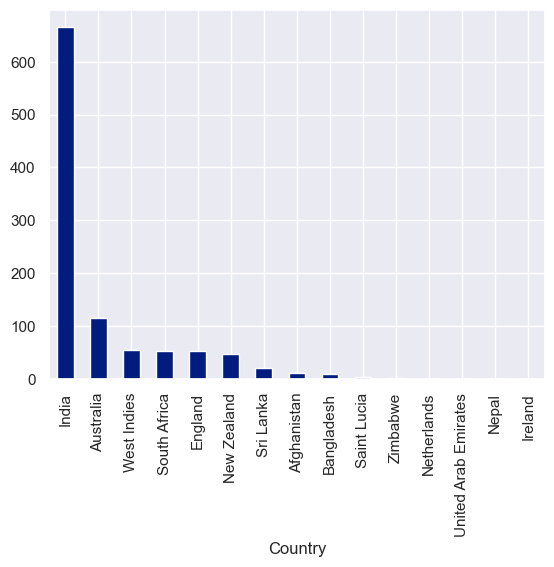

In [19]:
df['Country'].value_counts().plot(kind="bar")

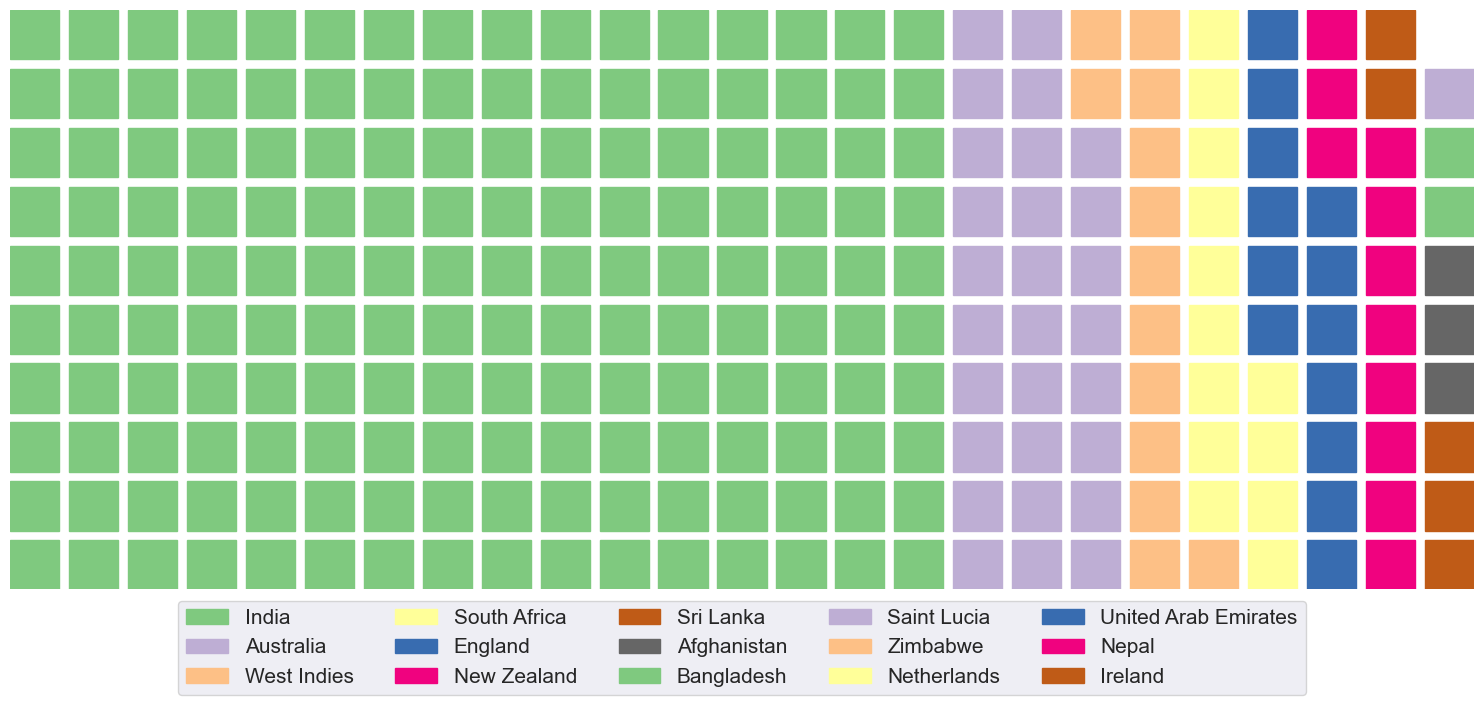

In [20]:
(lambda v: plt.figure(
    FigureClass=Waffle,
    rows = 10,
    columns = 25,
    values=v.values,
    labels=list(v.index),
    legend={     
        'bbox_to_anchor': (0.5, -0.1),               
        'fontsize': 10,
        'ncol': 5,
        'loc': 'lower center',
        'bbox_to_anchor': (0.5, -.2),
        'fontsize': 15

    },
    figsize=(15, 15),
    cmap_name = 'Accent'
))(df['Country'].value_counts())

plt.show()

In [21]:
df['Player'].value_counts()

Player
Jaydev Unadkat         10
Nathan Coulter-Nile     7
Mohit Sharma            6
Amit Mishra             6
Murugan Ashwin          5
                       ..
N Jagadeesan            1
Nishant Sindhu          1
Sanvir Singh            1
Samarth Vyas            1
Duan Jansen             1
Name: count, Length: 591, dtype: int64

In [22]:
df['Player'].value_counts().describe()

count    591.000000
mean       1.763113
std        1.105331
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: count, dtype: float64

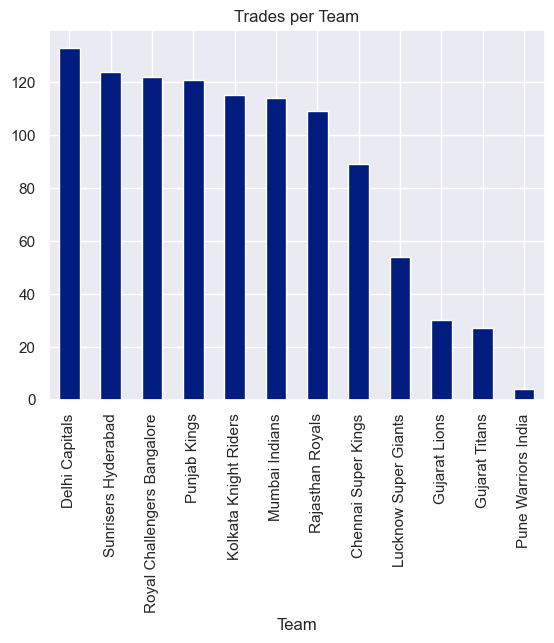

In [23]:
df['Team'].value_counts().plot(kind="bar")
plt.title("Trades per Team")
plt.show()

In [24]:
df['Base price'].describe()

count    1042.000000
mean       64.323608
std        62.611636
min        10.000000
25%        20.000000
50%        30.000000
75%       100.000000
max       244.000000
Name: Base price, dtype: float64

In [25]:
df['Winning bid'].describe()

count    1042.000000
mean      200.825192
std       269.391757
min        10.000000
25%        20.000000
50%        80.000000
75%       274.500000
max      1625.000000
Name: Winning bid, dtype: float64

In [26]:
df['Change'].describe()

count    1042.000000
mean      136.501583
std       238.500161
min         0.000000
25%         0.000000
50%         5.000000
75%       180.000000
max      1550.000000
Name: Change, dtype: float64

# Multivariate Analysis

## Secondary Tables

In [27]:
player_df = df.groupby('Player').agg(
    Num_of_Teams=('Team', 'nunique'),
    Base_Price_High=('Base price', 'max'),
    Base_Price_Low=('Base price', 'min'),
    Winning_Bid_High = ('Winning bid', 'max'),
    Winning_Bid_Mean = ('Winning bid', 'mean'),
    Winning_Bid_Low = ('Winning bid', 'max'),
    Largest_Delta = ('Change', 'max'),
    Smallest_Delta = ('Change', 'min'),
    Mean_Delta = ('Change', 'mean'),
    Country = ('Country', 'first')
).reset_index()
player_df.nunique()

Player              591
Num_of_Teams          6
Base_Price_High      15
Base_Price_Low       15
Winning_Bid_High    114
Winning_Bid_Mean    216
Winning_Bid_Low     114
Largest_Delta       129
Smallest_Delta       72
Mean_Delta          191
Country              15
dtype: int64

In [28]:
team_df = df.groupby('Team').agg(
    Num_of_Players = ('Player', 'nunique'),
    Winning_Bid_High = ('Winning bid', 'max'),
    Winning_Bid_Mean = ('Winning bid', 'mean'),
    Winning_Bid_Low = ('Winning bid', 'min'),
    Largest_Delta = ('Change', 'max'),
    Mean_Delta = ('Change', 'mean'),
    # Smallest_Delta = ('Change', 'min')
).reset_index()
team_df.nunique()

Team                12
Num_of_Players      11
Winning_Bid_High    11
Winning_Bid_Mean    12
Winning_Bid_Low      3
Largest_Delta       11
Mean_Delta          12
dtype: int64

In [29]:
yearly_df = df.groupby("Year").agg(
    Num_of_Auctioned_Players = ('Player', 'nunique'),
    Num_of_Bidding_Teams = ('Team', 'nunique'),
    Winning_High = ('Winning bid', 'max'),
    Winning_Mean = ('Winning bid', 'mean'),
    Winning_Low = ('Winning bid', 'min'),
    Base_High = ('Base price', 'max'),
    Base_Low = ('Base price', 'min'),
    Delta_High = ('Change', 'max'),
    Delta_Mean = ('Change', 'mean'),
    Total_Traded_Volume = ('Winning bid', 'sum'),
).reset_index()

yearly_df.nunique()

Year                        11
Num_of_Auctioned_Players    10
Num_of_Bidding_Teams         3
Winning_High                11
Winning_Mean                11
Winning_Low                  3
Base_High                    2
Base_Low                     3
Delta_High                  10
Delta_Mean                  11
Total_Traded_Volume         11
dtype: int64

Text(0, 0.5, 'Max Increase in Bid Price')

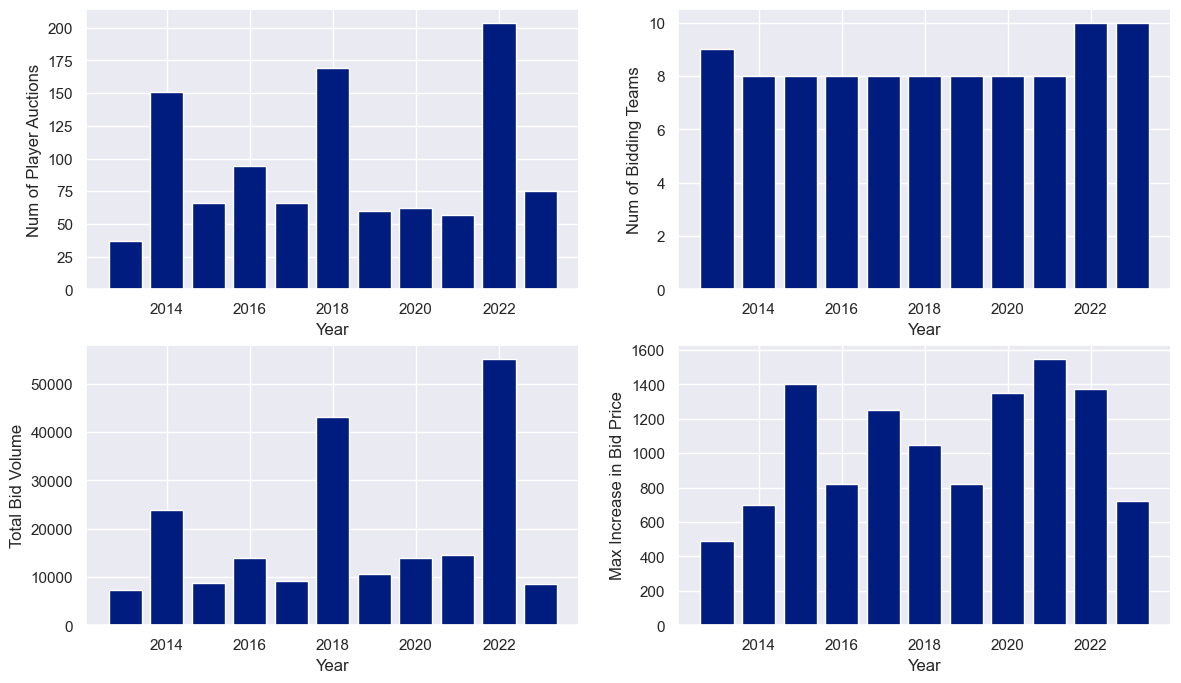

In [30]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.bar(yearly_df['Year'], yearly_df['Num_of_Auctioned_Players'])
plt.xlabel('Year')
plt.ylabel('Num of Player Auctions')

plt.subplot(2, 2, 2)
plt.bar(yearly_df['Year'], yearly_df['Num_of_Bidding_Teams'])
plt.xlabel('Year')
plt.ylabel('Num of Bidding Teams')

plt.subplot(2, 2, 3)
plt.bar(yearly_df['Year'], yearly_df['Total_Traded_Volume'])
plt.xlabel('Year')
plt.ylabel('Total Bid Volume')

plt.subplot(2, 2, 4)
plt.bar(yearly_df['Year'], yearly_df['Delta_High'])
plt.xlabel('Year')
plt.ylabel('Max Increase in Bid Price')

### Table Statistics

In [31]:
player_df.describe()

,Num_of_Teams,Base_Price_High,Base_Price_Low,Winning_Bid_High,Winning_Bid_Mean,Winning_Bid_Low,Largest_Delta,Smallest_Delta,Mean_Delta
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,1.593909,67.683926,45.798985,234.128257,160.637386,234.128257,171.559391,50.260914,104.322164
std,0.913680,66.707578,50.420205,313.411716,197.935981,313.411716,279.536278,129.032640,170.237917
min,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.000000
50%,1.000000,30.000000,20.000000,90.000000,75.000000,90.000000,20.000000,0.000000,12.500000
75%,2.000000,100.000000,50.000000,320.000000,234.906250,320.000000,250.000000,25.000000,151.250000
max,6.000000,244.000000,244.000000,1625.000000,1350.000000,1625.000000,1550.000000,1050.000000,1150.000000


In [32]:
team_df.describe()

,Num_of_Players,Winning_Bid_High,Winning_Bid_Mean,Winning_Bid_Low,Largest_Delta,Mean_Delta
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,78.500000,1249.354167,209.521156,30.333333,1121.812500,143.212204
std,39.725192,430.243595,69.128721,67.348933,385.053555,56.672999
min,4.000000,400.000000,82.333333,10.000000,390.000000,42.333333
25%,47.000000,1075.000000,187.295459,10.000000,965.000000,118.929996
50%,99.000000,1425.000000,199.116751,10.000000,1250.000000,138.226284
75%,109.500000,1531.250000,226.169920,10.000000,1381.250000,156.503009
max,119.000000,1625.000000,381.250000,244.000000,1550.000000,282.125000


In [33]:
yearly_df.describe()

,Year,Num_of_Auctioned_Players,Num_of_Bidding_Teams,Winning_High,Winning_Mean,Winning_Low,Base_High,Base_Low,Delta_High,Delta_Mean,Total_Traded_Volume
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2018.000000,94.636364,8.454545,1193.181818,188.432928,15.654545,204.000000,15.654545,1048.000000,127.793758,19023.622727
std,3.316625,54.494537,0.820200,374.708371,55.603896,5.031176,13.266499,5.031176,354.661811,45.870231,15842.932294
min,2013.000000,37.000000,8.000000,610.000000,115.066667,10.000000,200.000000,10.000000,488.000000,61.333333,7249.850000
25%,2015.500000,61.000000,8.000000,870.000000,143.361541,10.000000,200.000000,10.000000,772.500000,90.729665,8922.500000
50%,2018.000000,66.000000,8.000000,1250.000000,178.000000,20.000000,200.000000,20.000000,1050.000000,123.583333,13970.000000
75%,2020.500000,122.500000,8.500000,1537.500000,240.601302,20.000000,200.000000,20.000000,1362.500000,167.031399,19220.000000
max,2023.000000,204.000000,10.000000,1625.000000,270.808824,20.000000,244.000000,20.000000,1550.000000,196.495098,55245.000000


## Correlation Analysis

In [34]:
corr_player = player_df.select_dtypes(include="number").corr()
corr_team = team_df.select_dtypes(include="number").corr()
corr_yearly = yearly_df.select_dtypes(include="number").corr()

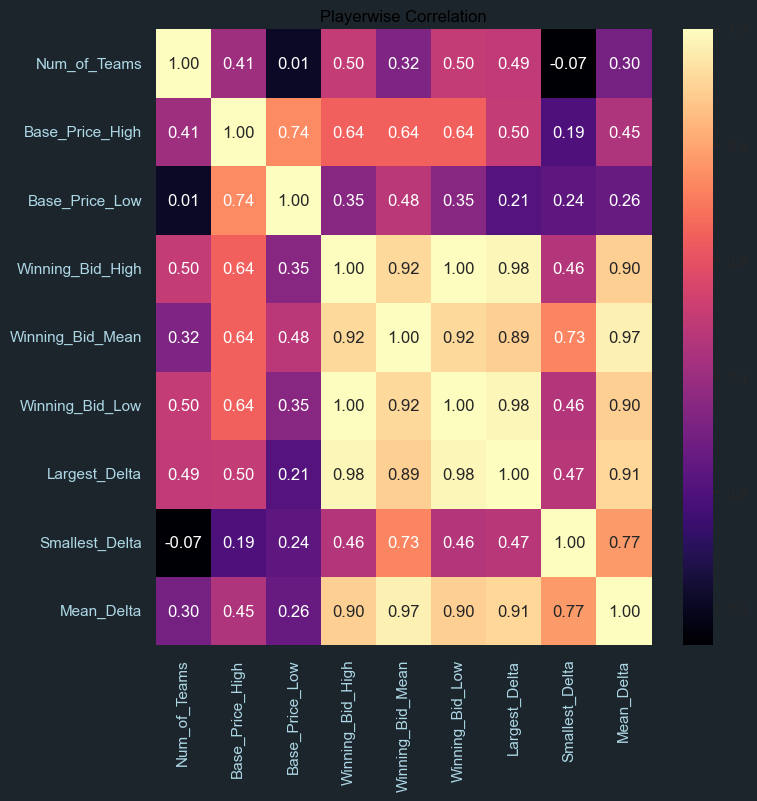

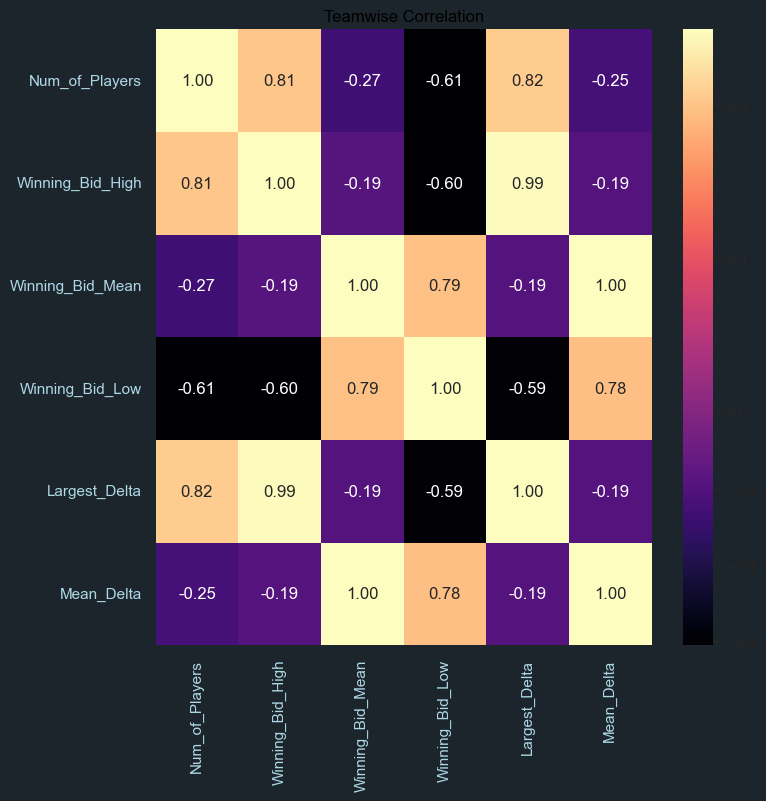

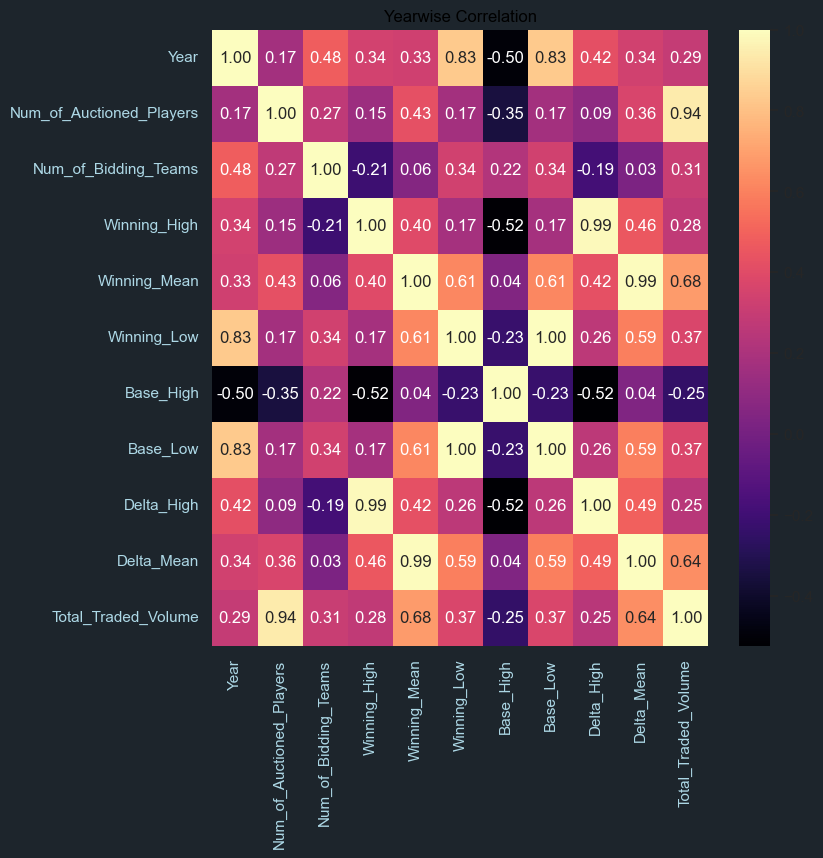

In [53]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_player, annot=True, cmap='magma', fmt='.2f')
plt.gcf().set_facecolor('#1d252c')

plt.title('Playerwise Correlation', color='black')
#plt.yticks(rotation=45)
#plt.xticks(rotation=45)

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), color='lightblue')
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), color='lightblue')

plt.show()

plt.figure(figsize=(8,8))
sns.heatmap(corr_team, annot=True, cmap='magma', fmt='.2f')
#plt.yticks(rotation=45)
#plt.xticks(rotation=45)
plt.gcf().set_facecolor('#1d252c')

plt.title('Teamwise Correlation', color='black')

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), color='lightblue')
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), color='lightblue')

plt.show()

plt.figure(figsize=(8,8))
sns.heatmap(corr_yearly, annot=True, cmap='magma', fmt='.2f')
#plt.yticks(rotation=45)
#plt.xticks(rotation=45)
plt.gcf().set_facecolor('#1d252c')

plt.title('Yearwise Correlation', color='black')

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), color='lightblue')
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), color='lightblue')

plt.show()

C:\Users\arham\AppData\Local\Temp\ipykernel_39172\2636333074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Winning bid", data=df, palette="flare")
C:\Users\arham\AppData\Local\Temp\ipykernel_39172\2636333074.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Base price", data=df, palette="magma")
C:\Users\arham\AppData\Local\Temp\ipykernel_39172\2636333074.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Change", data=df, palette="coolwarm")
C:\Users\arham\AppData\Local\Temp\ipykernel_39172\26

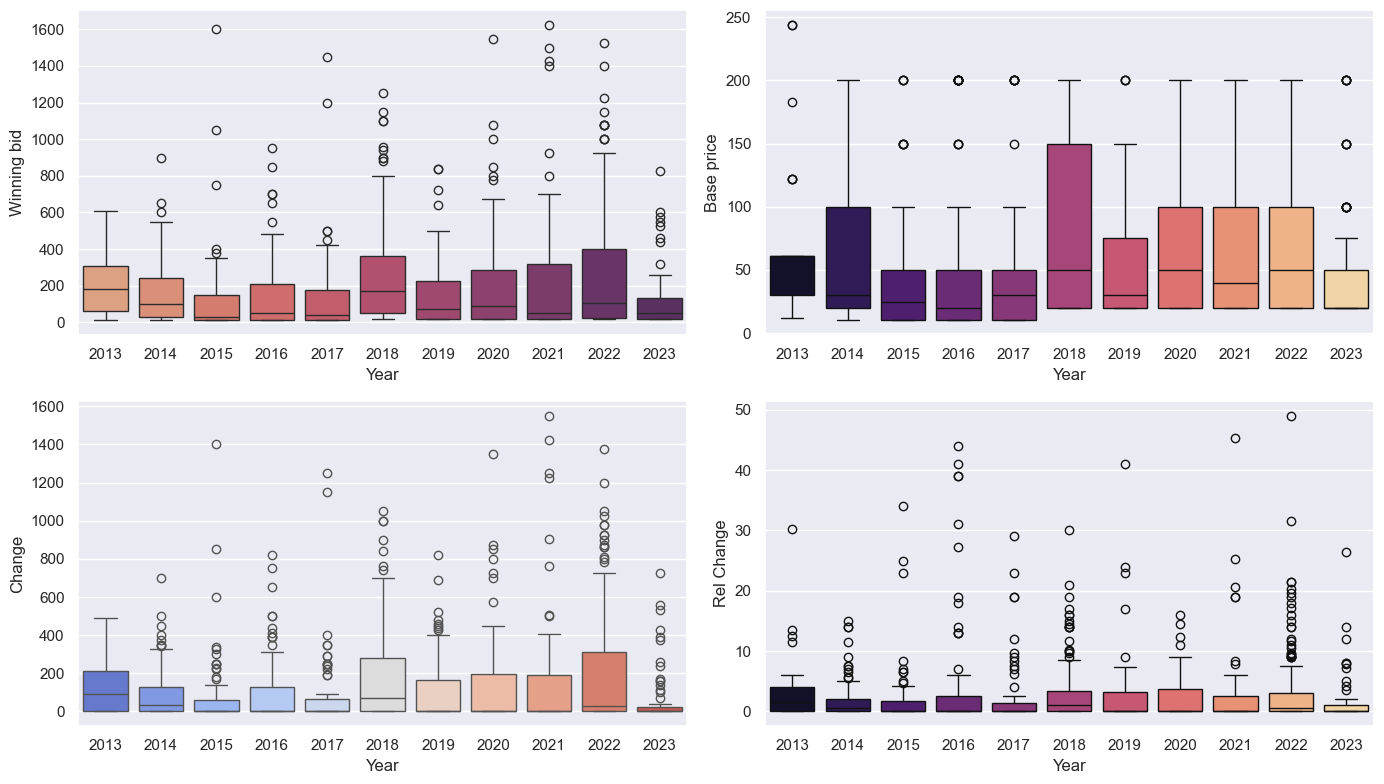

In [42]:
plt.figure(figsize=(14,8))
plt.subplot(2, 2, 1)
sns.boxplot(x="Year", y="Winning bid", data=df, palette="flare")
plt.tight_layout()
plt.subplot(2,2,2)
sns.boxplot(x="Year", y="Base price", data=df, palette="magma")
plt.tight_layout()
plt.subplot(2,2,3)
sns.boxplot(x="Year", y="Change", data=df, palette="coolwarm")
plt.tight_layout()
plt.subplot(2, 2, 4)
sns.boxplot(x="Year", y="Rel Change", data=df, palette="magma")

plt.show()

C:\Users\arham\AppData\Local\Temp\ipykernel_39172\1871087307.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Winning bid", data=df, palette="flare", showfliers=False)


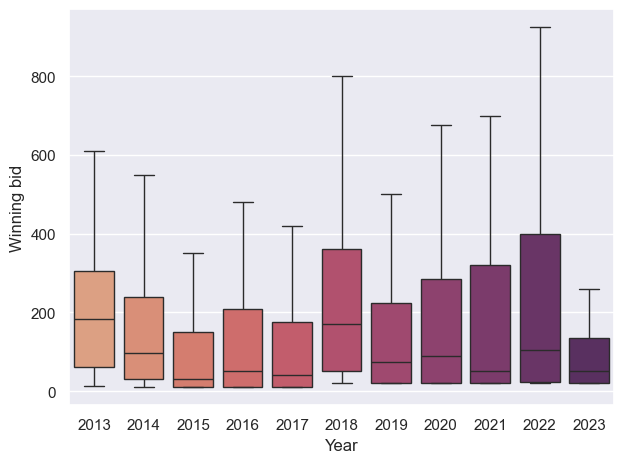

In [68]:
sns.boxplot(x="Year", y="Winning bid", data=df, palette="flare", showfliers=False)
plt.tight_layout()

C:\Users\arham\AppData\Local\Temp\ipykernel_39172\2698546265.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Base price", data=df, palette="magma")


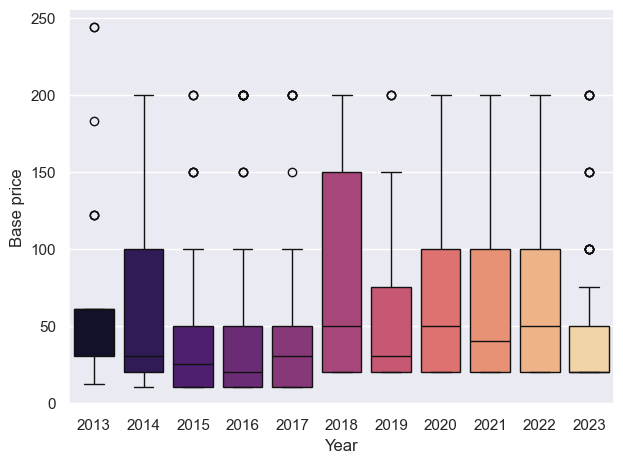

In [63]:
sns.boxplot(x="Year", y="Base price", data=df, palette="magma")
plt.tight_layout()

C:\Users\arham\AppData\Local\Temp\ipykernel_39172\3814944418.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Change", data=df, palette="rocket", showfliers=False)


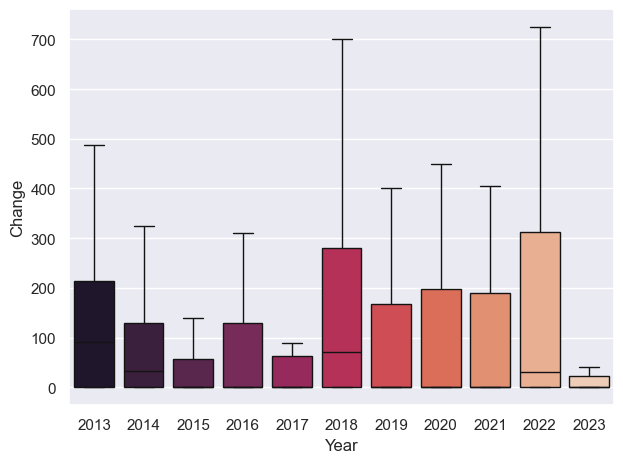

In [71]:
sns.boxplot(x="Year", y="Change", data=df, palette="rocket", showfliers=False)
plt.tight_layout()

C:\Users\arham\AppData\Local\Temp\ipykernel_39172\1090703969.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Rel Change", data=df, palette="rocket", showfliers=False)


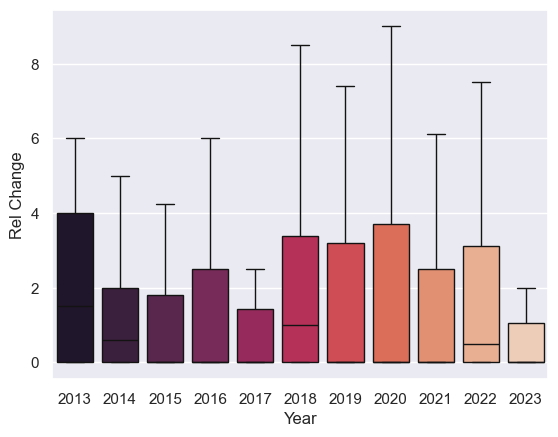

In [69]:
sns.boxplot(x="Year", y="Rel Change", data=df, palette="rocket", showfliers=False)
plt.show()

In [37]:
kruskal(*[group['Winning bid'].values for _, group in df.groupby('Country')])

KruskalResult(statistic=np.float64(144.17274125957306), pvalue=np.float64(1.0477006636951694e-23))

<Axes: >

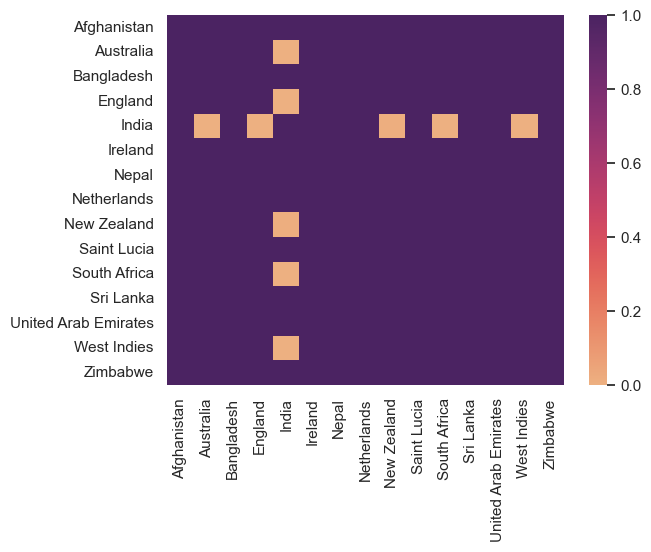

In [38]:
sns.heatmap(data=sp.posthoc_dunn(df, val_col='Winning bid', group_col='Country', p_adjust='bonferroni'), cmap='flare')

In [39]:
kruskal(*[group['Change'].values for _, group in df.groupby('Team')])

KruskalResult(statistic=np.float64(29.654982324119207), pvalue=np.float64(0.0017946773760918867))

<Axes: >

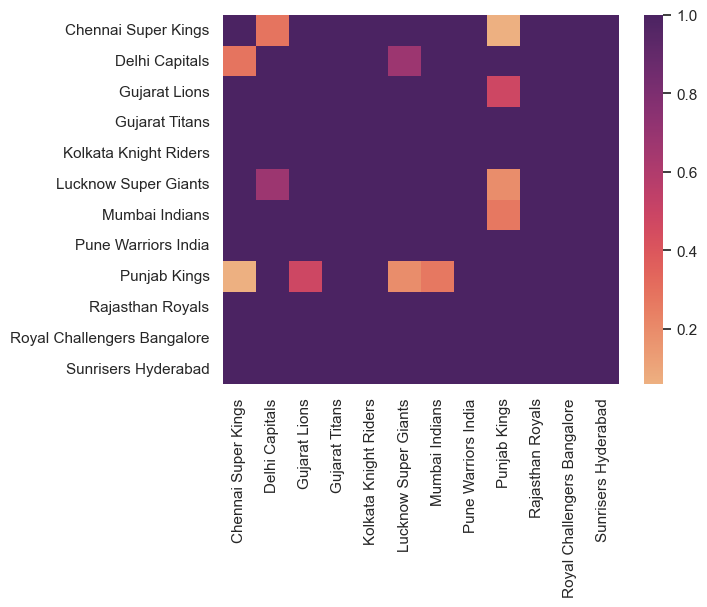

In [40]:
sns.heatmap(data=sp.posthoc_dunn(df, val_col='Change', group_col='Team', p_adjust='bonferroni'), cmap='flare')

C:\Users\arham\AppData\Local\Temp\ipykernel_39172\528127490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Winning bid', palette="coolwarm")
C:\Users\arham\AppData\Local\Temp\ipykernel_39172\528127490.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Change', palette="coolwarm")
C:\Users\arham\AppData\Local\Temp\ipykernel_39172\528127490.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Team", y="Winning bid", palette="flare")
C:\Users\arham\AppData\Local\Temp\ipykernel_3

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Delhi Capitals'),
  Text(2, 0, 'Pune Warriors India'),
  Text(3, 0, 'Mumbai Indians'),
  Text(4, 0, 'Chennai Super Kings'),
  Text(5, 0, 'Sunrisers Hyderabad'),
  Text(6, 0, 'Rajasthan Royals'),
  Text(7, 0, 'Punjab Kings'),
  Text(8, 0, 'Kolkata Knight Riders'),
  Text(9, 0, 'Lucknow Super Giants'),
  Text(10, 0, 'Gujarat Lions'),
  Text(11, 0, 'Gujarat Titans')])

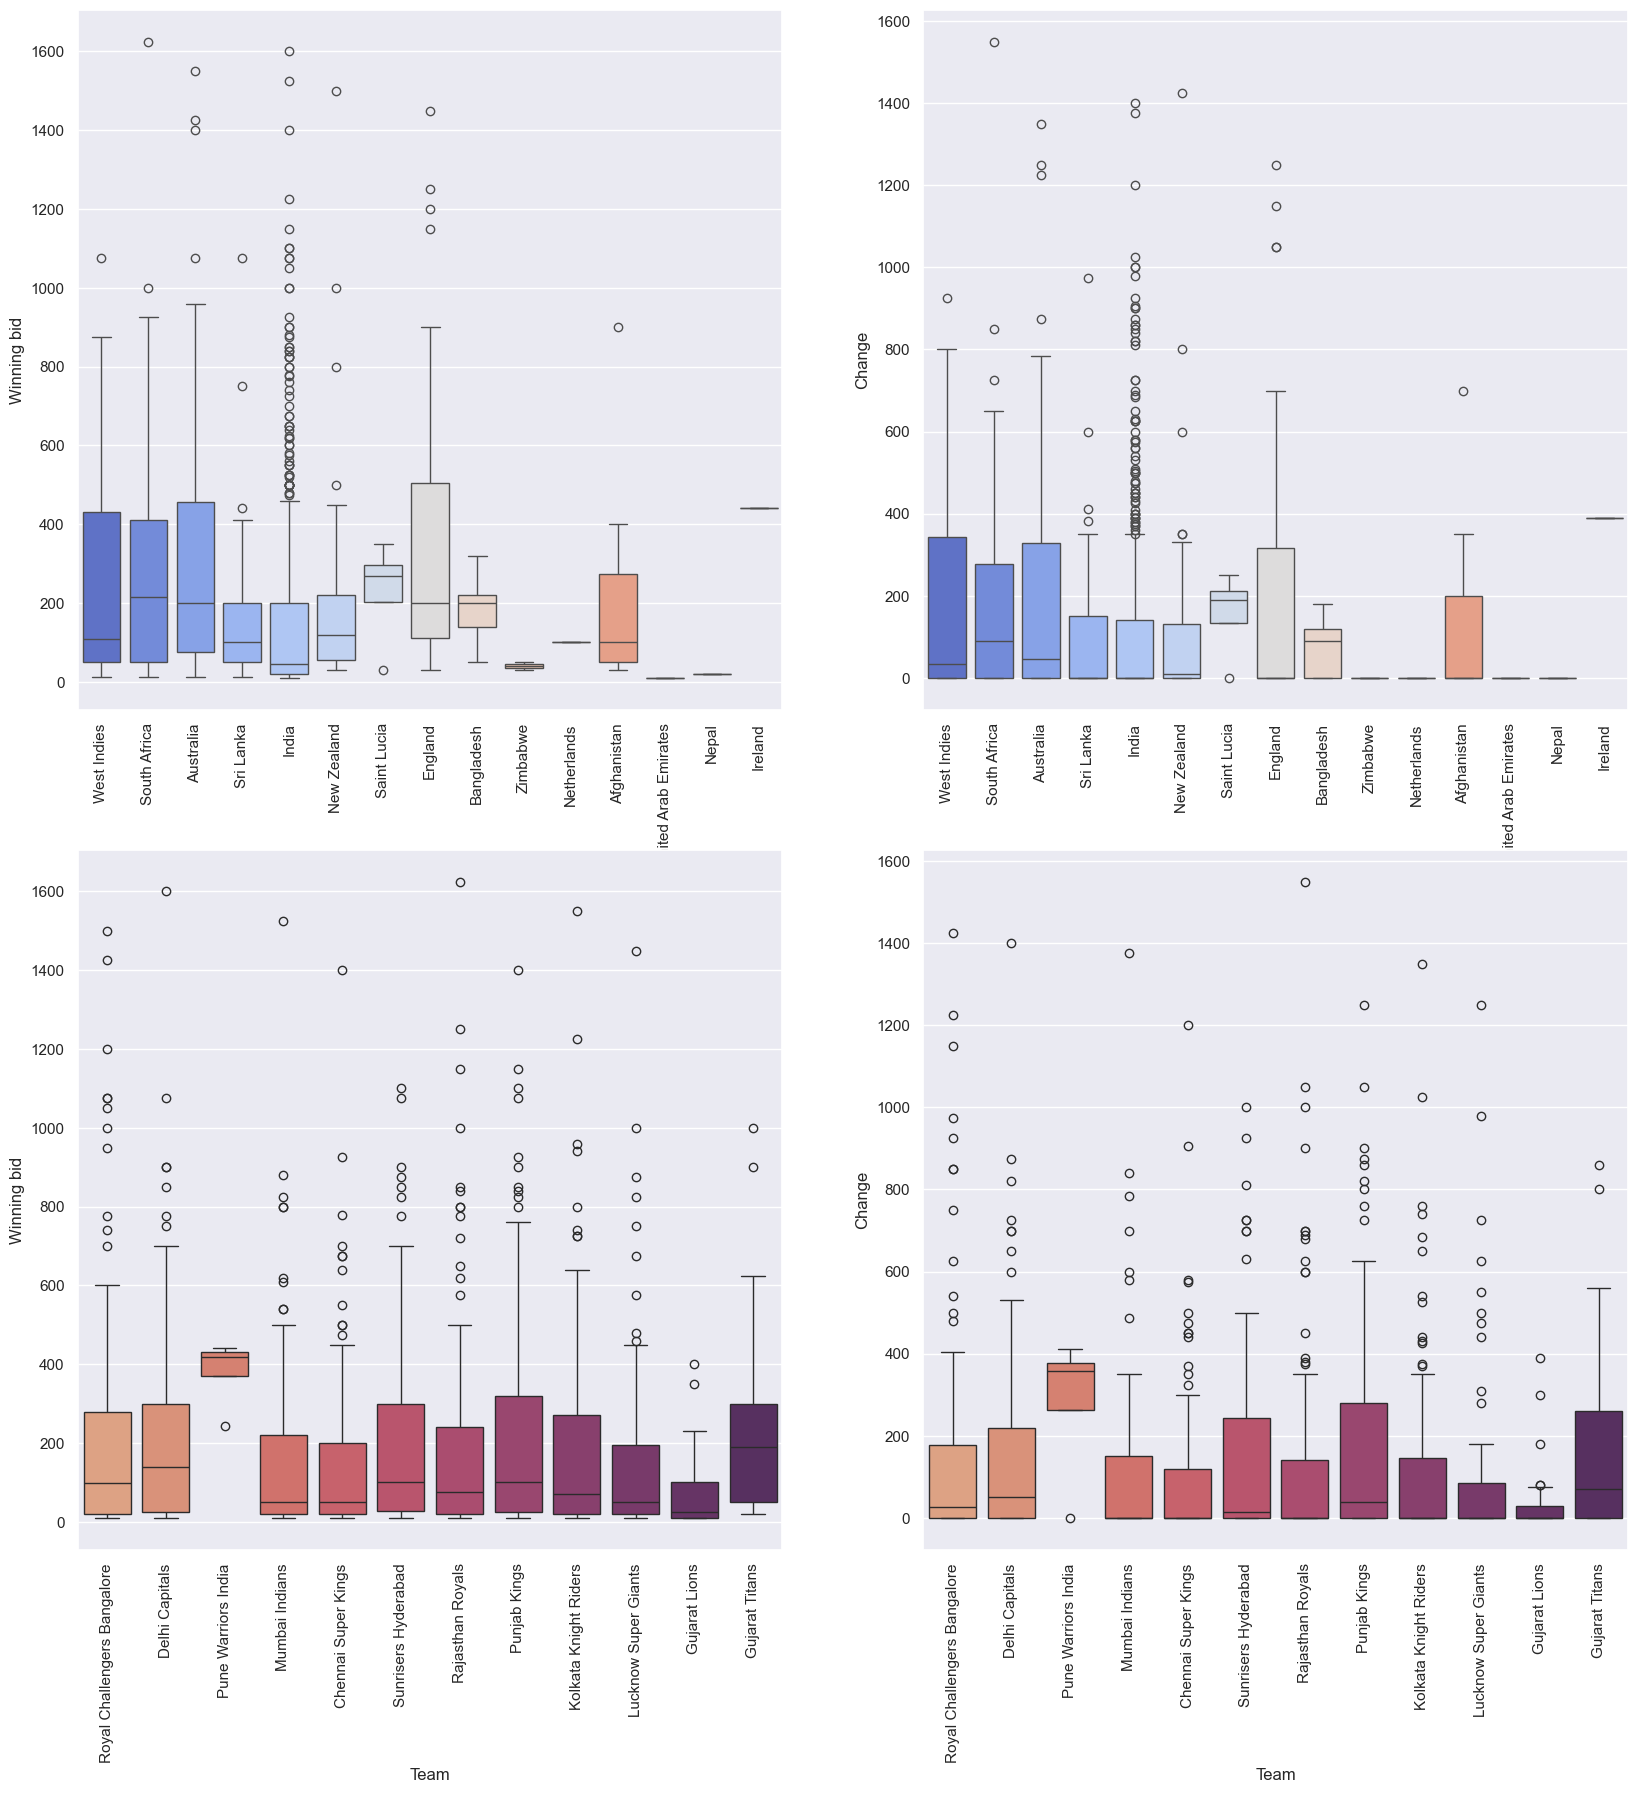

In [41]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Country', y='Winning bid', palette="coolwarm")
plt.xticks(rotation=90)
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Country', y='Change', palette="coolwarm")
plt.xticks(rotation=90)
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x="Team", y="Winning bid", palette="flare")
plt.xticks(rotation=90)
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x="Team", y="Change", palette="flare")
plt.xticks(rotation = 90)

C:\Users\arham\AppData\Local\Temp\ipykernel_39172\1080513428.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Winning bid', palette="coolwarm", showfliers=False, whis=1)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'West Indies'),
  Text(1, 0, 'South Africa'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Sri Lanka'),
  Text(4, 0, 'India'),
  Text(5, 0, 'New Zealand'),
  Text(6, 0, 'Saint Lucia'),
  Text(7, 0, 'England'),
  Text(8, 0, 'Bangladesh'),
  Text(9, 0, 'Zimbabwe'),
  Text(10, 0, 'Netherlands'),
  Text(11, 0, 'Afghanistan'),
  Text(12, 0, 'United Arab Emirates'),
  Text(13, 0, 'Nepal'),
  Text(14, 0, 'Ireland')])

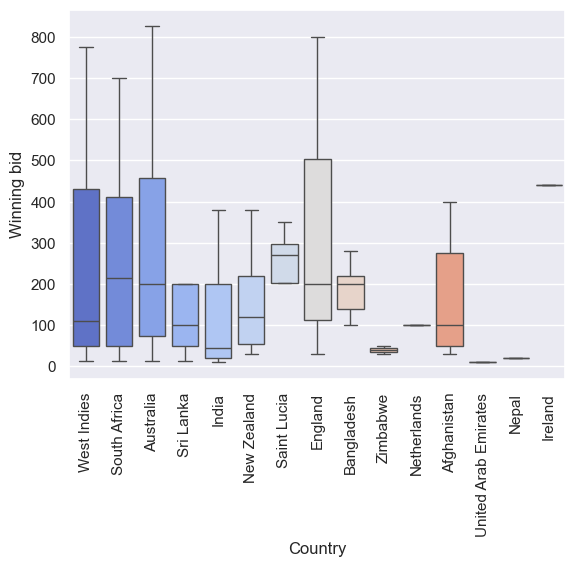

In [60]:
sns.boxplot(data=df, x='Country', y='Winning bid', palette="coolwarm", showfliers=False, whis=1)
plt.xticks(rotation=90)

C:\Users\arham\AppData\Local\Temp\ipykernel_39172\1393295541.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Change', palette="coolwarm", showfliers=False, whis=1)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'West Indies'),
  Text(1, 0, 'South Africa'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Sri Lanka'),
  Text(4, 0, 'India'),
  Text(5, 0, 'New Zealand'),
  Text(6, 0, 'Saint Lucia'),
  Text(7, 0, 'England'),
  Text(8, 0, 'Bangladesh'),
  Text(9, 0, 'Zimbabwe'),
  Text(10, 0, 'Netherlands'),
  Text(11, 0, 'Afghanistan'),
  Text(12, 0, 'United Arab Emirates'),
  Text(13, 0, 'Nepal'),
  Text(14, 0, 'Ireland')])

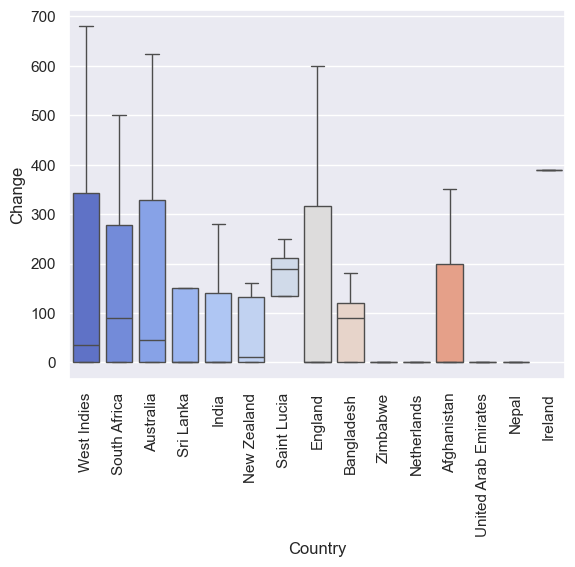

In [58]:
sns.boxplot(data=df, x='Country', y='Change', palette="coolwarm", showfliers=False, whis=1)
plt.xticks(rotation=90)

C:\Users\arham\AppData\Local\Temp\ipykernel_39172\3486245755.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Team", y="Winning bid", palette="flare", showfliers=False, whis=1)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Delhi Capitals'),
  Text(2, 0, 'Pune Warriors India'),
  Text(3, 0, 'Mumbai Indians'),
  Text(4, 0, 'Chennai Super Kings'),
  Text(5, 0, 'Sunrisers Hyderabad'),
  Text(6, 0, 'Rajasthan Royals'),
  Text(7, 0, 'Punjab Kings'),
  Text(8, 0, 'Kolkata Knight Riders'),
  Text(9, 0, 'Lucknow Super Giants'),
  Text(10, 0, 'Gujarat Lions'),
  Text(11, 0, 'Gujarat Titans')])

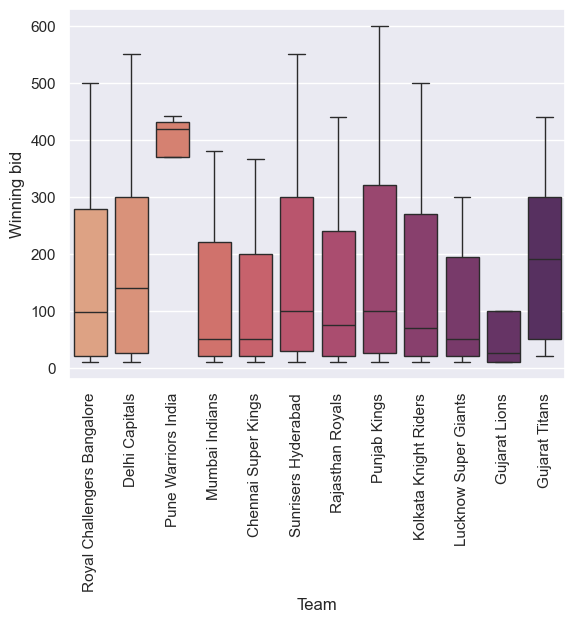

In [59]:
sns.boxplot(data=df, x="Team", y="Winning bid", palette="flare", showfliers=False, whis=1)
plt.xticks(rotation=90)

C:\Users\arham\AppData\Local\Temp\ipykernel_39172\2600030005.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Team", y="Change", palette="flare", showfliers=False, whis=1)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Delhi Capitals'),
  Text(2, 0, 'Pune Warriors India'),
  Text(3, 0, 'Mumbai Indians'),
  Text(4, 0, 'Chennai Super Kings'),
  Text(5, 0, 'Sunrisers Hyderabad'),
  Text(6, 0, 'Rajasthan Royals'),
  Text(7, 0, 'Punjab Kings'),
  Text(8, 0, 'Kolkata Knight Riders'),
  Text(9, 0, 'Lucknow Super Giants'),
  Text(10, 0, 'Gujarat Lions'),
  Text(11, 0, 'Gujarat Titans')])

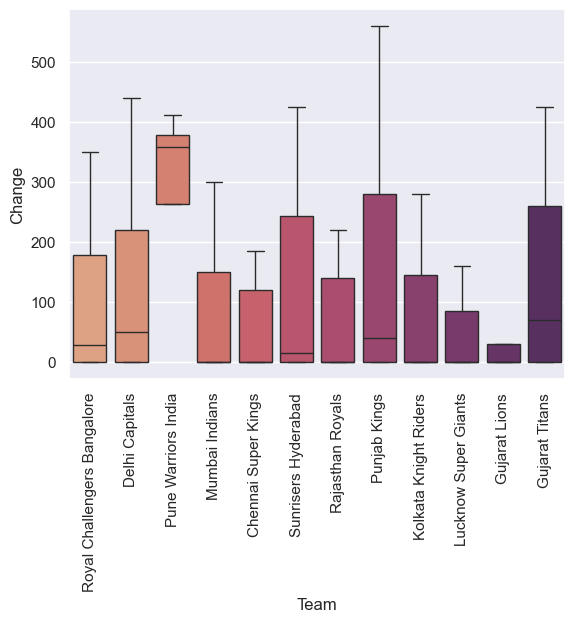

In [61]:
sns.boxplot(data=df, x="Team", y="Change", palette="flare", showfliers=False, whis=1)
plt.xticks(rotation = 90)